In [11]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import matplotlib.pyplot as plt
import csv
from pathlib import Path
import numpy as np
import time
%matplotlib inline

In [12]:
#Import tha relevant alpha vantage libraries
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.cryptocurrencies import CryptoCurrencies

In [186]:
#Import tha required libraries for datapreparation, analysis and preprocessing
import sklearn
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [14]:
#Import Required modules for Linear Regression
from sklearn.model_selection import train_test_split

# Import Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#Import different Models -  1. linera_model - LogisticRegression
#Import different Models -  5. svm - LinearSVC

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC 
#from sklearn.preprocessing import GetDummies
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [15]:
#set key
key = '32UEEELX55R5WBXX'
start_date = '2015-04-01' 

## Alpha_vantage for downloading stock data

In [16]:
#Alpha_Vantage API for stocks
#Instantiate API connection
ts = TimeSeries (key, output_format='pandas')

In [17]:
"""Return monthly time series in two json objects as data and meta_data. It raises ValueError when problems arise
Keyword Arguments: 
symbol:  the symbol for the equity we want to get its data"""
def get_monthly_adjusted(self, symbol):
    _FUNCTION_KEY = "TIME_SERIES_MONTHLY_ADJUSTED"
    return _FUNCTION_KEY, 'Time Series (Monthly)', 'Meta Data'

In [18]:
csv_path = Path("Resources/stock_tickers.csv")
Tickers_df = pd.read_csv(csv_path)
Tickers = Tickers_df.values.tolist()
print (Tickers)
Tickers = []
with open(csv_path, newline='') as inputfile:
    for row in csv.reader(inputfile):
        Tickers.append(row[0])

Tickers = ['AAPL',]
print(Tickers)

['AAPL', 'GOOGL', 'GOOG', 'MSFT', 'AMZN', 'FB', 'JPM', 'JNJ', 'XOM', 'BAC', 'WMT', 'WFC', 'V', 'BRK.B', 'T', 'HD', 'CVX', 'UNH', 'INTC', 'PFE', 'VZ', 'PG', 'BA', 'ORCL', 'CSCO', 'C', 'KO', 'MA', 'CMCSA', 'ABBV', 'DWDP', 'PEP', 'DIS', 'PM', 'MRK', 'IBM', 'MMM', 'NVDA', 'GE', 'MCD', 'AMGN', 'MO', 'NFLX', 'HON', 'MDT', 'GILD', 'NKE', 'UTX', 'BMY', 'ABT']


In [19]:
stk_df = {}
df = pd.DataFrame(columns=Tickers)
count = 0
for ticker in Tickers:
    data2, meta = ts.get_monthly_adjusted(ticker)
    stk_df.update({ticker+str("-close"):(data2.iloc[:,4])})
    time.sleep(12)

In [24]:
stk_df

{'AAPL-close': date
 2022-04-18    165.0700
 2022-03-31    174.6100
 2022-02-28    165.1200
 2022-01-31    174.5572
 2021-12-31    177.3437
                 ...   
 2000-04-28      0.9484
 2000-03-31      1.0382
 2000-02-29      0.8762
 2000-01-31      0.7931
 1999-12-31      0.7859
 Name: 5. adjusted close, Length: 269, dtype: float64,
 'GOOGL-close': date
 2022-04-18    2553.5300
 2022-03-31    2781.3500
 2022-02-28    2701.1400
 2022-01-31    2706.0700
 2021-12-31    2897.0400
                 ...    
 2005-01-31      98.1129
 2004-12-31      96.6935
 2004-11-30      91.2717
 2004-10-29      95.6152
 2004-09-30      65.0007
 Name: 5. adjusted close, Length: 212, dtype: float64,
 'GOOG-close': date
 2022-04-18    2559.22
 2022-03-31    2792.99
 2022-02-28    2697.82
 2022-01-31    2713.97
 2021-12-31    2893.59
                ...   
 2014-08-29     571.60
 2014-07-31     571.60
 2014-06-30     575.28
 2014-05-30     559.89
 2014-04-30     526.66
 Name: 5. adjusted close, Length: 97,

In [51]:
#Need to convert this into Month and Year so the feature can be consolidated with inflation data that is provided at the end of the month
stocks_df = pd.DataFrame(stk_df)
stocks_df.index = pd.to_datetime(stocks_df.index, infer_datetime_format = True)
#stocks_df = stocks_df[stocks_df.index > start_date]
print(stocks_df)   


#output = pd.DataFrame()
#df_dictionary = pd.DataFrame([dictionary])
#output = pd.concat([output, df_dictionary], ignore_index=True)
#print(output.head())
 


            AAPL-close  GOOGL-close  GOOG-close  MSFT-close  AMZN-close  \
date                                                                      
1999-12-31      0.7859          NaN         NaN     36.8573       76.13   
2000-01-31      0.7931          NaN         NaN     30.8970       64.56   
2000-02-29      0.8762          NaN         NaN     28.2136       68.88   
2000-03-31      1.0382          NaN         NaN     33.5425       67.00   
2000-04-28      0.9484          NaN         NaN     22.0197       55.19   
...                ...          ...         ...         ...         ...   
2021-12-31    177.3437      2897.04     2893.59    335.6252     3334.34   
2022-01-31    174.5572      2706.07     2713.97    310.3376     2991.47   
2022-02-28    165.1200      2701.14     2697.82    298.7900     3071.26   
2022-03-31    174.6100      2781.35     2792.99    308.3100     3259.95   
2022-04-18    165.0700      2553.53     2559.22    280.5200     3055.70   

            FB-close  JP

In [52]:
stocks_df.reset_index(inplace=True)
df6 = pd.melt(stocks_df, id_vars=['date'], 
                  var_name="%-close")
df6

,date,%-close,value
0,1999-12-31,AAPL-close,0.7859
1,2000-01-31,AAPL-close,0.7931
2,2000-02-29,AAPL-close,0.8762
3,2000-03-31,AAPL-close,1.0382
4,2000-04-28,AAPL-close,0.9484
...,...,...,...
13445,2021-12-31,ABT-close,139.6822
13446,2022-01-31,ABT-close,126.9606
13447,2022-02-28,ABT-close,120.1474
13448,2022-03-31,ABT-close,117.8962


In [53]:
df6 = df6[df6.date > start_date]

In [54]:
df6 = df6.set_index('date')
df6

,%-close,value
date,,
2015-04-30,AAPL-close,28.3992
2015-05-29,AAPL-close,29.6860
2015-06-30,AAPL-close,28.5798
2015-07-31,AAPL-close,27.6398
2015-08-31,AAPL-close,25.8099
...,...,...
2021-12-31,ABT-close,139.6822
2022-01-31,ABT-close,126.9606
2022-02-28,ABT-close,120.1474


In [325]:
df2 = df2.merge(sp_stocks_df, left_index=True, right_index=True)
df2

,%-close,value,SPY
date,,,
2015-04-30,AAPL-close,28.3992,183.1123
2015-04-30,CRM-close,72.8200,183.1123
2015-05-29,AAPL-close,29.6860,185.4664
2015-05-29,CRM-close,72.7500,185.4664
2015-06-30,AAPL-close,28.5798,181.7385
...,...,...,...
2022-02-28,CRM-close,210.5300,435.2923
2022-03-31,AAPL-close,174.6100,451.6400
2022-03-31,CRM-close,212.3200,451.6400


## Alpha_vantage for downloading S&P 500 stock data

In [32]:
SPTicker = ['SPY']

In [33]:
sp_stk_df = {}
sp_df = pd.DataFrame(columns=SPTicker)
for spticker in SPTicker:
    spdata, meta = ts.get_monthly_adjusted(spticker)
    sp_stk_df.update({spticker:(spdata.iloc[:,4])})

In [34]:
#Need to convert this into Month and Year so the feature can be consolidated with inflation data that is provided at the end of the month
sp_stocks_df = pd.DataFrame(sp_stk_df)
sp_stocks_df.index = pd.to_datetime(sp_stocks_df.index, infer_datetime_format = True)
sp_stocks_df = sp_stocks_df[sp_stocks_df.index > start_date]
print(sp_stocks_df)


                 SPY
date                
2022-04-18  437.9700
2022-03-31  451.6400
2022-02-28  435.2923
2022-01-31  448.5317
2021-12-31  473.5049
...              ...
2015-08-31  174.3680
2015-07-31  185.7636
2015-06-30  181.7385
2015-05-29  185.4664
2015-04-30  183.1123

[85 rows x 1 columns]


In [35]:
# As we wouldnot want to use the current month S&P returns to predict the current month stock prices, using the previosu month figures
sp_stocks_df_prev = sp_stocks_df.copy()
sp_stocks_df_prev = sp_stocks_df_prev.shift(1)
sp_stocks_df_prev

,SPY
date,
2022-04-18,NaN
2022-03-31,437.9700
2022-02-28,451.6400
2022-01-31,435.2923
2021-12-31,448.5317
...,...
2015-08-31,170.0105
2015-07-31,174.3680
2015-06-30,185.7636


## Alpha_vantage for downloading Treasury Yields

In [36]:
#Getting Treasury Yield for 5 year treasury stock
#Need to convert this into Month and Year so the feature can be consolidated with stock data that is provided at the end of the month
url = f'https://www.alphavantage.co/query?function=TREASURY_YIELD&interval=monthly&maturity=5year&apikey={key}'
r = requests.get(url)
data = r.json()
TYield = pd.DataFrame(data['data'])
TYield.index = TYield['date']
TYield = TYield.drop(TYield.columns[[0]], axis=1)
TYield.index = pd.to_datetime(TYield.index, infer_datetime_format = True)
TYield = TYield[TYield.index > start_date]
TYield

,value
date,
2022-03-01,2.11
2022-02-01,1.81
2022-01-01,1.54
2021-12-01,1.23
2021-11-01,1.20
...,...
2015-09-01,1.49
2015-08-01,1.54
2015-07-01,1.63


## Alpha_vantage for Inflation Expectation

In [37]:
#Getting Inflation Expectation 
#Taking Inflation expectation and not inflation data because only the expectation is available on a monthly basis, while the inflation data available is annual
#need to be converted to month and time
url = f'https://www.alphavantage.co/query?function=INFLATION_EXPECTATION&apikey={key}'
r = requests.get(url)
data = r.json()
InflationExp = pd.DataFrame(data['data'])
InflationExp.index = InflationExp['date']
InflationExp = InflationExp.drop(InflationExp.columns[[0]], axis=1)
InflationExp.index  = pd.to_datetime(InflationExp.index, infer_datetime_format = True)
InflationExp = InflationExp[InflationExp.index > start_date]
InflationExp


,value
date,
2022-02-01,4.9
2022-01-01,4.9
2021-12-01,4.8
2021-11-01,4.9
2021-10-01,4.8
...,...
2015-09-01,2.8
2015-08-01,2.8
2015-07-01,2.8


## Alpha_vantage for Consumer Sentiment

In [38]:
#Getting Consumer Sentiment
url = f'https://www.alphavantage.co/query?function=CONSUMER_SENTIMENT&apikey={key}'
r = requests.get(url)
data = r.json()
Sentiment = pd.DataFrame(data['data'])
Sentiment.index = Sentiment['date']
Sentiment = Sentiment.drop(Sentiment.columns[[0]], axis=1)
Sentiment.index = pd.to_datetime(Sentiment.index, infer_datetime_format = True)
Sentiment = Sentiment[Sentiment.index > start_date]
Sentiment

,value
date,
2022-02-01,62.8
2022-01-01,67.2
2021-12-01,70.6
2021-11-01,67.4
2021-10-01,71.7
...,...
2015-09-01,87.2
2015-08-01,91.9
2015-07-01,93.1


## Alpha_vantage for EPS Download

In [77]:
##How to use it as this is available only on a quarterly basis
#df = pd.DataFrame(columns=Tickers)
eps_df = {}
reps = pd.DataFrame()
for ticker in Tickers:
    url = f'https://www.alphavantage.co/query?function=EARNINGS&symbol=IBM&apikey={key}'
    r = requests.get(url)
    data = r.json()
    Ticker1 = pd.DataFrame(data['quarterlyEarnings'])
    Ticker1.index = Ticker1['fiscalDateEnding']
    Ticker1 = Ticker1.drop(Ticker1.columns[[0,1,3,4,5]], axis=1)
    Ticker1.rename(columns={"reportedEPS":ticker},inplace=True)
    eps_df.update(Ticker1)
REPS_df = pd.DataFrame(eps_df)
REPS_df.index = pd.to_datetime(REPS_df.index, infer_datetime_format = True)
REPS_df = REPS_df[REPS_df.index > start_date]
REPS_df["Date"] = pd.to_datetime(REPS_df.index, format="%Y-%m")
REPS_df = REPS_df.set_index("Date").resample("m").ffill()
REPS_df 


stocks_df.reset_index(inplace=True)
df6 = pd.melt(stocks_df, id_vars=['date'], 
                  var_name="%-close")
df6




KeyError: 'quarterlyEarnings'

In [78]:
##How to use it as this is available only on a quarterly basis
#df = pd.DataFrame(columns=Tickers)
eps_df = {}
reps = pd.DataFrame()
for ticker in Tickers:
    url = f'https://www.alphavantage.co/query?function=EARNINGS&symbol=IBM&apikey={key}'
    r = requests.get(url)
    data = r.json()
    Ticker1 = pd.DataFrame(data['quarterlyEarnings'])
    Ticker1.index = Ticker1['fiscalDateEnding']
    Ticker1 = Ticker1.drop(Ticker1.columns[[0,1,3,4,5]], axis=1)
    Ticker1.rename(columns={"reportedEPS":ticker},inplace=True)
    eps_df.update(Ticker1)
    time.sleep(12)    

KeyError: "The following 'id_vars' are not present in the DataFrame: ['date']"

In [116]:
REPS_df = pd.DataFrame(eps_df)
REPS_df.index = pd.to_datetime(REPS_df.index, infer_datetime_format = True)
REPS_df["Date"] = pd.to_datetime(REPS_df.index, format="%Y-%m")
REPS_df = REPS_df.set_index("Date").resample("bm").ffill()
REPS_df = REPS_df.add_suffix("-close")
REPS_df

,AAPL-close,GOOGL-close,GOOG-close,MSFT-close,AMZN-close,FB-close,JPM-close,JNJ-close,XOM-close,BAC-close,...,AMGN-close,MO-close,NFLX-close,HON-close,MDT-close,GILD-close,NKE-close,UTX-close,BMY-close,ABT-close
Date,,,,,,,,,,,,,,,,,,,,,
1996-04-30,0.55,0.55,0.55,0.55,0.55,0.55,0.55,0.55,0.55,0.55,...,0.55,0.55,0.55,0.55,0.55,0.55,0.55,0.55,0.55,0.55
1996-05-31,0.55,0.55,0.55,0.55,0.55,0.55,0.55,0.55,0.55,0.55,...,0.55,0.55,0.55,0.55,0.55,0.55,0.55,0.55,0.55,0.55
1996-06-28,0.55,0.55,0.55,0.55,0.55,0.55,0.55,0.55,0.55,0.55,...,0.55,0.55,0.55,0.55,0.55,0.55,0.55,0.55,0.55,0.55
1996-07-31,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,...,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63
1996-08-30,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,...,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-31,2.33,2.33,2.33,2.33,2.33,2.33,2.33,2.33,2.33,2.33,...,2.33,2.33,2.33,2.33,2.33,2.33,2.33,2.33,2.33,2.33
2021-09-30,2.52,2.52,2.52,2.52,2.52,2.52,2.52,2.52,2.52,2.52,...,2.52,2.52,2.52,2.52,2.52,2.52,2.52,2.52,2.52,2.52
2021-10-29,2.52,2.52,2.52,2.52,2.52,2.52,2.52,2.52,2.52,2.52,...,2.52,2.52,2.52,2.52,2.52,2.52,2.52,2.52,2.52,2.52


In [117]:
REPS_df.reset_index(inplace=True)
REPS_df

,Date,AAPL-close,GOOGL-close,GOOG-close,MSFT-close,AMZN-close,FB-close,JPM-close,JNJ-close,XOM-close,...,AMGN-close,MO-close,NFLX-close,HON-close,MDT-close,GILD-close,NKE-close,UTX-close,BMY-close,ABT-close
0,1996-04-30,0.55,0.55,0.55,0.55,0.55,0.55,0.55,0.55,0.55,...,0.55,0.55,0.55,0.55,0.55,0.55,0.55,0.55,0.55,0.55
1,1996-05-31,0.55,0.55,0.55,0.55,0.55,0.55,0.55,0.55,0.55,...,0.55,0.55,0.55,0.55,0.55,0.55,0.55,0.55,0.55,0.55
2,1996-06-28,0.55,0.55,0.55,0.55,0.55,0.55,0.55,0.55,0.55,...,0.55,0.55,0.55,0.55,0.55,0.55,0.55,0.55,0.55,0.55
3,1996-07-31,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,...,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63
4,1996-08-30,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,...,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,2021-08-31,2.33,2.33,2.33,2.33,2.33,2.33,2.33,2.33,2.33,...,2.33,2.33,2.33,2.33,2.33,2.33,2.33,2.33,2.33,2.33
305,2021-09-30,2.52,2.52,2.52,2.52,2.52,2.52,2.52,2.52,2.52,...,2.52,2.52,2.52,2.52,2.52,2.52,2.52,2.52,2.52,2.52
306,2021-10-29,2.52,2.52,2.52,2.52,2.52,2.52,2.52,2.52,2.52,...,2.52,2.52,2.52,2.52,2.52,2.52,2.52,2.52,2.52,2.52
307,2021-11-30,2.52,2.52,2.52,2.52,2.52,2.52,2.52,2.52,2.52,...,2.52,2.52,2.52,2.52,2.52,2.52,2.52,2.52,2.52,2.52


In [118]:
REPS_df_revised = pd.melt(REPS_df, id_vars=['Date'], var_name="%-close")
REPS_df_revised.rename(columns = {'value':'EPS'}, inplace = True)
REPS_df_revised

#df.rename(columns = {'old_col1':'new_col1', 'old_col2':'new_col2'}, inplace = True)
##REPS_df = REPS_df[REPS_df.index > start_date]

,Date,%-close,EPS
0,1996-04-30,AAPL-close,0.55
1,1996-05-31,AAPL-close,0.55
2,1996-06-28,AAPL-close,0.55
3,1996-07-31,AAPL-close,0.63
4,1996-08-30,AAPL-close,0.63
...,...,...,...
15445,2021-08-31,ABT-close,2.33
15446,2021-09-30,ABT-close,2.52
15447,2021-10-29,ABT-close,2.52
15448,2021-11-30,ABT-close,2.52


In [120]:
REPS_df_revised = REPS_df_revised[REPS_df_revised.Date > start_date]
REPS_df_revised = REPS_df_revised.set_index('Date')
REPS_df_revised

,%-close,EPS
Date,,
2015-04-30,AAPL-close,2.91
2015-05-29,AAPL-close,2.91
2015-06-30,AAPL-close,3.84
2015-07-31,AAPL-close,3.84
2015-08-31,AAPL-close,3.84
...,...,...
2021-08-31,ABT-close,2.33
2021-09-30,ABT-close,2.52
2021-10-29,ABT-close,2.52


In [146]:
stocks_df7=df6.copy()
stocks_df7.reset_index(inplace=True)
stocks_df7['string-date']=stocks_df7['date'].dt.strftime('%Y-%m-%d')
stocks_df7['combined']=stocks_df7['date'].astype(str)+'_'+stocks_df7['%-close']
stocks_df7

,date,%-close,value,string-date,combined
0,2015-04-30,AAPL-close,28.3992,2015-04-30,2015-04-30_AAPL-close
1,2015-05-29,AAPL-close,29.6860,2015-05-29,2015-05-29_AAPL-close
2,2015-06-30,AAPL-close,28.5798,2015-06-30,2015-06-30_AAPL-close
3,2015-07-31,AAPL-close,27.6398,2015-07-31,2015-07-31_AAPL-close
4,2015-08-31,AAPL-close,25.8099,2015-08-31,2015-08-31_AAPL-close
...,...,...,...,...,...
4245,2021-12-31,ABT-close,139.6822,2021-12-31,2021-12-31_ABT-close
4246,2022-01-31,ABT-close,126.9606,2022-01-31,2022-01-31_ABT-close
4247,2022-02-28,ABT-close,120.1474,2022-02-28,2022-02-28_ABT-close
4248,2022-03-31,ABT-close,117.8962,2022-03-31,2022-03-31_ABT-close


In [149]:
eps_df8 = REPS_df_revised.copy()
eps_df8.reset_index(inplace=True)
eps_df8['string-date']=eps_df8['Date'].dt.strftime('%Y-%m-%d')
eps_df8['combined']=eps_df8['Date'].astype(str)+'_'+eps_df8['%-close']
eps_df8

,Date,%-close,EPS,string-date,combined
0,2015-04-30,AAPL-close,2.91,2015-04-30,2015-04-30_AAPL-close
1,2015-05-29,AAPL-close,2.91,2015-05-29,2015-05-29_AAPL-close
2,2015-06-30,AAPL-close,3.84,2015-06-30,2015-06-30_AAPL-close
3,2015-07-31,AAPL-close,3.84,2015-07-31,2015-07-31_AAPL-close
4,2015-08-31,AAPL-close,3.84,2015-08-31,2015-08-31_AAPL-close
...,...,...,...,...,...
4045,2021-08-31,ABT-close,2.33,2021-08-31,2021-08-31_ABT-close
4046,2021-09-30,ABT-close,2.52,2021-09-30,2021-09-30_ABT-close
4047,2021-10-29,ABT-close,2.52,2021-10-29,2021-10-29_ABT-close
4048,2021-11-30,ABT-close,2.52,2021-11-30,2021-11-30_ABT-close


In [156]:
stocks_eps_concat = pd.merge(left=stocks_df7, right = eps_df8, left_on='combined',right_on='combined',how ='left')
stocks_eps_concat

##DataFrame.drop(labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')[source]


,date,%-close_x,value,string-date_x,combined,Date,%-close_y,EPS,string-date_y
0,2015-04-30,AAPL-close,28.3992,2015-04-30,2015-04-30_AAPL-close,2015-04-30,AAPL-close,2.91,2015-04-30
1,2015-05-29,AAPL-close,29.6860,2015-05-29,2015-05-29_AAPL-close,2015-05-29,AAPL-close,2.91,2015-05-29
2,2015-06-30,AAPL-close,28.5798,2015-06-30,2015-06-30_AAPL-close,2015-06-30,AAPL-close,3.84,2015-06-30
3,2015-07-31,AAPL-close,27.6398,2015-07-31,2015-07-31_AAPL-close,2015-07-31,AAPL-close,3.84,2015-07-31
4,2015-08-31,AAPL-close,25.8099,2015-08-31,2015-08-31_AAPL-close,2015-08-31,AAPL-close,3.84,2015-08-31
...,...,...,...,...,...,...,...,...,...
4245,2021-12-31,ABT-close,139.6822,2021-12-31,2021-12-31_ABT-close,2021-12-31,ABT-close,3.35,2021-12-31
4246,2022-01-31,ABT-close,126.9606,2022-01-31,2022-01-31_ABT-close,NaT,NaN,NaN,NaN
4247,2022-02-28,ABT-close,120.1474,2022-02-28,2022-02-28_ABT-close,NaT,NaN,NaN,NaN
4248,2022-03-31,ABT-close,117.8962,2022-03-31,2022-03-31_ABT-close,NaT,NaN,NaN,NaN


In [157]:
stocks_eps_concat.drop(columns=['string-date_x','combined', 'Date', '%-close_y', 'string-date_y' ],inplace=True,axis=1)

stocks_eps_concat

,date,%-close_x,value,EPS
0,2015-04-30,AAPL-close,28.3992,2.91
1,2015-05-29,AAPL-close,29.6860,2.91
2,2015-06-30,AAPL-close,28.5798,3.84
3,2015-07-31,AAPL-close,27.6398,3.84
4,2015-08-31,AAPL-close,25.8099,3.84
...,...,...,...,...
4245,2021-12-31,ABT-close,139.6822,3.35
4246,2022-01-31,ABT-close,126.9606,NaN
4247,2022-02-28,ABT-close,120.1474,NaN
4248,2022-03-31,ABT-close,117.8962,NaN


In [172]:
stocks_eps_concat.rename(columns={"%-close_x": "%-close"}, inplace=True)
stocks_eps_concat.set_index('date', inplace=True)
stocks_eps_concat

,%-close,value,EPS
date,,,
2015-04-30,AAPL-close,28.3992,2.91
2015-05-29,AAPL-close,29.6860,2.91
2015-06-30,AAPL-close,28.5798,3.84
2015-07-31,AAPL-close,27.6398,3.84
2015-08-31,AAPL-close,25.8099,3.84
...,...,...,...
2021-12-31,ABT-close,139.6822,3.35
2022-01-31,ABT-close,126.9606,NaN
2022-02-28,ABT-close,120.1474,NaN


## Alpha_vantage for Interest Rate

In [162]:
## Federal Interest Rate (Monthly)

url = 'https://www.alphavantage.co/query?function=FEDERAL_FUNDS_RATE&interval=monthly&apikey=demo'
r = requests.get(url)
data = r.json()
Interest_Rate = pd.DataFrame(data['data'])
Interest_Rate.index = Interest_Rate['date']
Interest_Rate = Interest_Rate.drop(Interest_Rate.columns[[0]], axis=1)
Interest_Rate.index = pd.to_datetime(Interest_Rate.index, infer_datetime_format = True)
Interest_Rate = Interest_Rate[Interest_Rate.index > start_date]
Interest_Rate

,value
date,
2022-03-01,0.20
2022-02-01,0.08
2022-01-01,0.08
2021-12-01,0.08
2021-11-01,0.08
...,...
2015-09-01,0.14
2015-08-01,0.14
2015-07-01,0.13


## Alpha_vantage for Unemployment Rates

In [163]:
#Getting Unemployment Rates
url = f'https://www.alphavantage.co/query?function=UNEMPLOYMENT&apikey=demo{key}'
r = requests.get(url)
data = r.json()
Unemployment = pd.DataFrame(data['data'])
Unemployment.index = Unemployment['date']
Unemployment = Unemployment.drop(Unemployment.columns[[0]], axis=1)
Unemployment.index = pd.to_datetime(Unemployment.index, infer_datetime_format = True)
Unemployment = Unemployment[Unemployment.index > start_date]
Unemployment

,value
date,
2022-03-01,3.6
2022-02-01,3.8
2022-01-01,4.0
2021-12-01,3.9
2021-11-01,4.2
...,...
2015-09-01,5.0
2015-08-01,5.1
2015-07-01,5.2


# Dataset_Preliminary

## Modify the feature dataframes to have a consistent date format and comsolidate them into one file
- Treasury Yields: TYield : treasury_yield 
- Inflation Expectation: InflationExp: inflation_expect
- S&P 500 Correlation: sp_stocks_df : sp_500
- Unemployment Rate: Unemployment : unemployment_rate
- Consumer Sentiments: Sentiment : consumer_sentiment

In [164]:
#Convert the Treasury yields into Month and Year format for conatenating with other dataframes
treasury_yield = TYield.copy()
treasury_yield = treasury_yield.sort_values(by=['date'], ascending=True)
treasury_yield['value'] = treasury_yield['value'].astype(float)
treasury_yield['value'] = treasury_yield.pct_change(periods=1)
treasury_yield = treasury_yield.reset_index()
treasury_yield['date'] = treasury_yield['date'].dt.to_period('M')
treasury_yield.set_index('date', inplace = True)
treasury_yield.rename(columns={"value": "treausry_yield"}, inplace = True)
treasury_yield

,treausry_yield
date,
2015-05,NaN
2015-06,0.090909
2015-07,-0.029762
2015-08,-0.055215
2015-09,-0.032468
...,...
2021-11,0.081081
2021-12,0.025000
2022-01,0.252033


In [165]:
#Convert the inflation expectation into Month and Year format for conatenating with other dataframes
inflation_expect = InflationExp.copy()
inflation_expect = inflation_expect.sort_values(by=['date'], ascending=True)
inflation_expect['value'] = inflation_expect['value'].astype(float)
inflation_expect['value'] = inflation_expect.pct_change(periods=1)
inflation_expect = inflation_expect.reset_index()
inflation_expect['date'] = inflation_expect['date'].dt.to_period('M')
inflation_expect.set_index('date', inplace = True)
inflation_expect.rename(columns={"value": "inflation_expectation"}, inplace = True)
inflation_expect

,inflation_expectation
date,
2015-05,NaN
2015-06,-0.035714
2015-07,0.037037
2015-08,0.000000
2015-09,0.000000
...,...
2021-10,0.043478
2021-11,0.020833
2021-12,-0.020408


In [166]:
#Convert the S&P 500 into Month and Year format for conatenating with other dataframes

sp_500 = sp_stocks_df_prev.copy()
sp_500 = sp_500.sort_values(by=['date'], ascending=True)
sp_500['SPY'] = sp_500.pct_change(periods=1)
sp_500 = sp_500.reset_index()
sp_500['date'] = sp_500['date'].dt.to_period('M')
sp_500.set_index('date', inplace = True)
sp_500.rename(columns={"SPY": "sp500_return"}, inplace = True)
sp_500

,sp500_return
date,
2015-04,NaN
2015-05,-0.020100
2015-06,0.022148
2015-07,-0.061345
2015-08,-0.024990
...,...
2021-12,-0.052741
2022-01,-0.029517
2022-02,0.037556


In [167]:
#Convert the Unemployment rate into Month and Year format for concatenating with other dataframes
unemployment_rate = Unemployment.copy()
unemployment_rate = unemployment_rate.sort_values(by=['date'], ascending=True)
unemployment_rate['value'] = unemployment_rate['value'].astype(float)
unemployment_rate['value'] = unemployment_rate.pct_change(periods=1)
unemployment_rate = unemployment_rate.reset_index()
unemployment_rate['date'] = unemployment_rate['date'].dt.to_period('M')
unemployment_rate.set_index('date', inplace = True)
unemployment_rate.rename(columns={"value": "unemployment_rate"}, inplace = True)
unemployment_rate

,unemployment_rate
date,
2015-05,NaN
2015-06,-0.053571
2015-07,-0.018868
2015-08,-0.019231
2015-09,-0.019608
...,...
2021-11,-0.086957
2021-12,-0.071429
2022-01,0.025641


In [168]:
#Convert the Consumer Sentiment into Month and Year format for concatenating with other dataframes
consumer_sentiment = Sentiment.copy()
consumer_sentiment.replace('.', np.NaN, inplace=True)
consumer_sentiment = consumer_sentiment.sort_values(by=['date'], ascending=True)
consumer_sentiment = consumer_sentiment.dropna()
consumer_sentiment['value'] = consumer_sentiment['value'].astype(float)
consumer_sentiment['value'] = consumer_sentiment.pct_change(periods=1)
consumer_sentiment = consumer_sentiment.reset_index()
consumer_sentiment['date'] = consumer_sentiment['date'].dt.to_period('M')
consumer_sentiment.set_index('date', inplace = True)
consumer_sentiment.rename(columns={"value": "consumer_sentiment"}, inplace = True)
consumer_sentiment

,consumer_sentiment
date,
2015-05,NaN
2015-06,0.059537
2015-07,-0.031217
2015-08,-0.012889
2015-09,-0.051143
...,...
2021-10,-0.015110
2021-11,-0.059972
2021-12,0.047478


In [169]:
macro_features = pd.concat([treasury_yield, inflation_expect, sp_500, unemployment_rate, consumer_sentiment], axis=1, join='inner')

In [170]:
macro_features.dropna(inplace=True)
macro_features

,treausry_yield,inflation_expectation,sp500_return,unemployment_rate,consumer_sentiment
date,,,,,
2015-06,0.090909,-0.035714,0.022148,-0.053571,0.059537
2015-07,-0.029762,0.037037,-0.061345,-0.018868,-0.031217
2015-08,-0.055215,0.000000,-0.024990,-0.019231,-0.012889
2015-09,-0.032468,0.000000,0.085286,-0.019608,-0.051143
2015-10,-0.067114,-0.035714,0.003655,0.000000,0.032110
...,...,...,...,...,...
2021-10,0.290698,0.043478,-0.008035,-0.021277,-0.015110
2021-11,0.081081,0.020833,0.046288,-0.086957,-0.059972
2021-12,0.025000,-0.020408,-0.052741,-0.071429,0.047478


In [175]:
stocks_eps_concat
stocks_eps_concat = stocks_eps_concat.fillna({
        'EPS' : stocks_eps_concat['EPS'].ffill()
    })
stocks_eps_concat

,%-close,value,EPS
date,,,
2015-04-30,AAPL-close,28.3992,2.91
2015-05-29,AAPL-close,29.6860,2.91
2015-06-30,AAPL-close,28.5798,3.84
2015-07-31,AAPL-close,27.6398,3.84
2015-08-31,AAPL-close,25.8099,3.84
...,...,...,...
2021-12-31,ABT-close,139.6822,3.35
2022-01-31,ABT-close,126.9606,3.35
2022-02-28,ABT-close,120.1474,3.35


In [176]:
#Need to convert this into Month and Year so the feature can be consolidated with inflation data that is provided at the end of the month
stocks_df  
stocks_dataframe = stocks_eps_concat.copy()  
stocks_dataframe.dropna(inplace=True)
stocks_dataframe = stocks_dataframe.reset_index()
stocks_dataframe['date'] = stocks_dataframe['date'].dt.to_period('M')
stocks_dataframe.set_index('date', inplace = True)
#stocks_dataframe.drop('CRM-close', axis=1, inplace=True)
#stocks_dataframe.drop(stocks_dataframe['CRM-close'], inplace=True)
# Setup our target.  This identifies if the price went up or down
ticker_list = list(stocks_dataframe["%-close"].unique())
stocks_rolling = pd.DataFrame()
for ticker in ticker_list:
    stocks_dataframe_s = stocks_dataframe[stocks_dataframe["%-close"]==ticker]
    stocks_dataframe_s["Target"] = stocks_dataframe_s["value"].rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])
    stocks_rolling = pd.concat([stocks_rolling, stocks_dataframe_s], axis=0)
stocks_dataframe_prev = stocks_rolling.copy()
stocks_dataframe_prev = stocks_dataframe_prev.shift(1)
#stocks_dataframe_prev.to_csv("Stocks_Buy_Analysis.csv")

/Users/unicorn/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [177]:
stocks_rolling

,%-close,value,EPS,Target
date,,,,
2015-04,AAPL-close,28.3992,2.91,NaN
2015-05,AAPL-close,29.6860,2.91,1.0
2015-06,AAPL-close,28.5798,3.84,0.0
2015-07,AAPL-close,27.6398,3.84,0.0
2015-08,AAPL-close,25.8099,3.84,0.0
...,...,...,...,...
2021-12,ABT-close,139.6822,3.35,1.0
2022-01,ABT-close,126.9606,3.35,0.0
2022-02,ABT-close,120.1474,3.35,0.0


## ML Model

In [183]:
ticker_df  = stocks_rolling.merge(macro_features, left_index=True, right_index=True)
ticker_df.to_csv("ticker-df-final.csv")
ticker_df

,%-close,value,EPS,Target,treausry_yield,inflation_expectation,sp500_return,unemployment_rate,consumer_sentiment
date,,,,,,,,,
2015-06,AAPL-close,28.5798,3.84,0.0,0.090909,-0.035714,0.022148,-0.053571,0.059537
2015-06,GOOGL-close,540.0400,3.84,0.0,0.090909,-0.035714,0.022148,-0.053571,0.059537
2015-06,GOOG-close,520.5100,3.84,0.0,0.090909,-0.035714,0.022148,-0.053571,0.059537
2015-06,MSFT-close,39.3470,3.84,0.0,0.090909,-0.035714,0.022148,-0.053571,0.059537
2015-06,AMZN-close,434.0900,3.84,1.0,0.090909,-0.035714,0.022148,-0.053571,0.059537
...,...,...,...,...,...,...,...,...,...
2022-02,GILD-close,59.6512,3.35,0.0,0.175325,0.000000,0.037556,-0.050000,-0.065476
2022-02,NKE-close,136.2333,3.35,0.0,0.175325,0.000000,0.037556,-0.050000,-0.065476
2022-02,UTX-close,102.7000,3.35,1.0,0.175325,0.000000,0.037556,-0.050000,-0.065476


In [184]:
ticker_corr = ticker_df.corr()
ticker_corr

,value,Target,treausry_yield,inflation_expectation,sp500_return,unemployment_rate,consumer_sentiment
value,1.000000,0.036066,0.041009,0.027702,0.002081,-0.004578,-0.022944
Target,0.036066,1.000000,0.058742,0.014269,-0.071067,0.076475,-0.009995
treausry_yield,0.041009,0.058742,1.000000,-0.033198,-0.079706,-0.343978,0.441576
inflation_expectation,0.027702,0.014269,-0.033198,1.000000,0.099041,-0.095264,-0.225803
sp500_return,0.002081,-0.071067,-0.079706,0.099041,1.000000,0.111234,-0.147895
unemployment_rate,-0.004578,0.076475,-0.343978,-0.095264,0.111234,1.000000,-0.481216
consumer_sentiment,-0.022944,-0.009995,0.441576,-0.225803,-0.147895,-0.481216,1.000000


<AxesSubplot:>

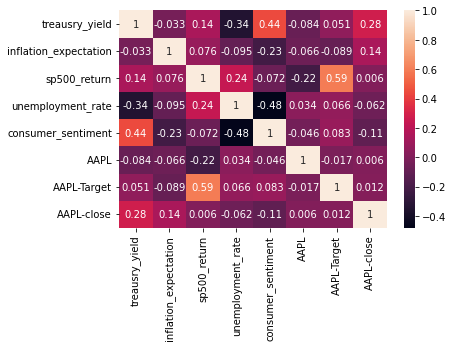

In [278]:
sns.heatmap(ticker_corr, annot=True)

## Data Preparation

In [279]:
FEATURES = list(ticker_df.iloc[:,:-1])
FEATURES

['treausry_yield',
 'inflation_expectation',
 'sp500_return',
 'unemployment_rate',
 'consumer_sentiment',
 'AAPL',
 'AAPL-Target']

In [189]:
FEATURES = list(ticker_df)
FEATURES

['%-close',
 'value',
 'EPS',
 'Target',
 'treausry_yield',
 'inflation_expectation',
 'sp500_return',
 'unemployment_rate',
 'consumer_sentiment']

In [190]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)
# Create a list of the columns with categorical variables
categorical_variables = ["%-close"]
# Use the fit_transform function from the OneHotEncoder to encode the data
encoded_data = enc.fit_transform(ticker_df[categorical_variables])
# Create a DataFrame with the encoded variables
encoded_df = pd.DataFrame(
    encoded_data,
    columns = enc.get_feature_names(categorical_variables)
)
# Display sample data
encoded_df.head()


/Users/unicorn/opt/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,%-close_AAPL-close,%-close_ABBV-close,%-close_ABT-close,%-close_AMGN-close,%-close_AMZN-close,%-close_BA-close,%-close_BAC-close,%-close_BMY-close,%-close_BRK.B-close,%-close_C-close,...,%-close_PG-close,%-close_PM-close,%-close_T-close,%-close_UNH-close,%-close_UTX-close,%-close_V-close,%-close_VZ-close,%-close_WFC-close,%-close_WMT-close,%-close_XOM-close
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [200]:
numerical_variables = ticker_df.drop(columns = categorical_variables)
numerical_variables.reset_index(inplace=True)
# apply the dtype attribute
result = numerical_variables.dtypes
print(result)

date                     period[M]
value                      float64
EPS                         object
Target                     float64
treausry_yield             float64
inflation_expectation      float64
sp500_return               float64
unemployment_rate          float64
consumer_sentiment         float64
dtype: object


In [207]:
stock_analysis_data = pd.concat([numerical_variables, encoded_df], axis=1)
stock_analysis_data.set_index('date',inplace=True)
stock_analysis_data.head(100)

,value,EPS,Target,treausry_yield,inflation_expectation,sp500_return,unemployment_rate,consumer_sentiment,%-close_AAPL-close,%-close_ABBV-close,...,%-close_PG-close,%-close_PM-close,%-close_T-close,%-close_UNH-close,%-close_UTX-close,%-close_V-close,%-close_VZ-close,%-close_WFC-close,%-close_WMT-close,%-close_XOM-close
date,,,,,,,,,,,,,,,,,,,,,
2015-06,28.5798,3.84,0.0,0.090909,-0.035714,0.022148,-0.053571,0.059537,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-06,540.0400,3.84,0.0,0.090909,-0.035714,0.022148,-0.053571,0.059537,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-06,520.5100,3.84,0.0,0.090909,-0.035714,0.022148,-0.053571,0.059537,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-06,39.3470,3.84,0.0,0.090909,-0.035714,0.022148,-0.053571,0.059537,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-06,434.0900,3.84,1.0,0.090909,-0.035714,0.022148,-0.053571,0.059537,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-07,42.3027,3.84,0.0,-0.029762,0.037037,-0.061345,-0.018868,-0.031217,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2015-07,53.9902,3.84,0.0,-0.029762,0.037037,-0.061345,-0.018868,-0.031217,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-07,44.6702,3.84,1.0,-0.029762,0.037037,-0.061345,-0.018868,-0.031217,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [220]:
stock_analysis_data.insert(len(stock_analysis_data.columns)-1, 'Target', stock_analysis_data.pop('Target'))
stock_analysis_data

,value,EPS,treausry_yield,inflation_expectation,sp500_return,unemployment_rate,consumer_sentiment,%-close_AAPL-close,%-close_ABBV-close,%-close_ABT-close,...,%-close_PM-close,%-close_T-close,%-close_UNH-close,%-close_UTX-close,%-close_V-close,%-close_VZ-close,%-close_WFC-close,%-close_WMT-close,%-close_XOM-close,Target
date,,,,,,,,,,,,,,,,,,,,,
2015-06,28.5798,3.84,0.090909,-0.035714,0.022148,-0.053571,0.059537,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-06,540.0400,3.84,0.090909,-0.035714,0.022148,-0.053571,0.059537,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-06,520.5100,3.84,0.090909,-0.035714,0.022148,-0.053571,0.059537,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-06,39.3470,3.84,0.090909,-0.035714,0.022148,-0.053571,0.059537,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-06,434.0900,3.84,0.090909,-0.035714,0.022148,-0.053571,0.059537,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02,59.6512,3.35,0.175325,0.000000,0.037556,-0.050000,-0.065476,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-02,136.2333,3.35,0.175325,0.000000,0.037556,-0.050000,-0.065476,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-02,102.7000,3.35,0.175325,0.000000,0.037556,-0.050000,-0.065476,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [221]:
stock_analysis_data.dropna(inplace=True)
stock_analysis_data

,value,EPS,treausry_yield,inflation_expectation,sp500_return,unemployment_rate,consumer_sentiment,%-close_AAPL-close,%-close_ABBV-close,%-close_ABT-close,...,%-close_PM-close,%-close_T-close,%-close_UNH-close,%-close_UTX-close,%-close_V-close,%-close_VZ-close,%-close_WFC-close,%-close_WMT-close,%-close_XOM-close,Target
date,,,,,,,,,,,,,,,,,,,,,
2015-06,28.5798,3.84,0.090909,-0.035714,0.022148,-0.053571,0.059537,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-06,540.0400,3.84,0.090909,-0.035714,0.022148,-0.053571,0.059537,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-06,520.5100,3.84,0.090909,-0.035714,0.022148,-0.053571,0.059537,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-06,39.3470,3.84,0.090909,-0.035714,0.022148,-0.053571,0.059537,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-06,434.0900,3.84,0.090909,-0.035714,0.022148,-0.053571,0.059537,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02,59.6512,3.35,0.175325,0.000000,0.037556,-0.050000,-0.065476,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-02,136.2333,3.35,0.175325,0.000000,0.037556,-0.050000,-0.065476,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-02,102.7000,3.35,0.175325,0.000000,0.037556,-0.050000,-0.065476,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [222]:
FEATURES = list(stock_analysis_data.iloc[:,:-1])
FEATURES

['value',
 'EPS',
 'treausry_yield',
 'inflation_expectation',
 'sp500_return',
 'unemployment_rate',
 'consumer_sentiment',
 '%-close_AAPL-close',
 '%-close_ABBV-close',
 '%-close_ABT-close',
 '%-close_AMGN-close',
 '%-close_AMZN-close',
 '%-close_BA-close',
 '%-close_BAC-close',
 '%-close_BMY-close',
 '%-close_BRK.B-close',
 '%-close_C-close',
 '%-close_CMCSA-close',
 '%-close_CSCO-close',
 '%-close_CVX-close',
 '%-close_DIS-close',
 '%-close_DWDP-close',
 '%-close_FB-close',
 '%-close_GE-close',
 '%-close_GILD-close',
 '%-close_GOOG-close',
 '%-close_GOOGL-close',
 '%-close_HD-close',
 '%-close_HON-close',
 '%-close_IBM-close',
 '%-close_INTC-close',
 '%-close_JNJ-close',
 '%-close_JPM-close',
 '%-close_KO-close',
 '%-close_MA-close',
 '%-close_MCD-close',
 '%-close_MDT-close',
 '%-close_MMM-close',
 '%-close_MO-close',
 '%-close_MRK-close',
 '%-close_MSFT-close',
 '%-close_NFLX-close',
 '%-close_NKE-close',
 '%-close_NVDA-close',
 '%-close_ORCL-close',
 '%-close_PEP-close',
 '%-clo

## Machine Learning Application

In [223]:
result_dict = {}

In [224]:
#Takes inputs from Build a model - y_test, y_pred - and calculates the rations
## This function is called from the model function 

def summarize_classification(y_test,
                            y_pred
                            ):
    acc = accuracy_score (y_test, y_pred, normalize = True)
    num_acc = accuracy_score (y_test, y_pred, normalize = False)
    prec = precision_score (y_test, y_pred)
    recall = recall_score (y_test, y_pred)
    
    return {
        'accuracy':acc,
        'precision': prec,
        'recall':recall,
        'accuracy_count':num_acc}   

In [225]:
#Build a model that can work with several of the SKLearn functions
#1. Build Model -
## a.Inputs for the model will be the 
###a.1 classifier function (linerar regression, linear discriminant etc.,)
###b. name of y columns
###c. names of X columns
###d. dataset that includes x & y columns
###e. test fractions used to split the database into test and train sets - used in the train_test_split
## b.Identifies the X&Y columns in the dataset and the names of X columns and y columns specified  as input. 
## c.Peforms train test split on the dataset provided
## d.Peforms the instatntiation and training (fit) for the model that will be supplied later
## e.Peforms the prediction based on the test model 
## e.Peforms the prediction based on the test model 
## f.Calculate different ratios to identify the model efficiencies by calling the summarize_classification function defined earlier 
## g.Load the prediction results in a dataframe for analyzing the results.

def build_model(classifier_fn,
                name_of_y_col,
                names_of_x_cols,
                dataset,
                test_frac=0.2):
    X = dataset[names_of_x_cols]
    y = dataset[name_of_y_col]
    
    x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = test_frac)
    
    model = classifier_fn (x_train, y_train)
    
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    
    train_summary = summarize_classification (y_train, y_pred_train) 
    test_summary = summarize_classification (y_test, y_pred)
    
    pred_results = pd.DataFrame({'y_test':y_test,
                                'y_pred':y_pred})
    model_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)
    
    return {
        'training': train_summary,
        'test': test_summary,
        'confusion_matrix': model_crosstab
    }

In [226]:
#Takes the results from the return and prints it out for comparision purposes
def compare_results():
    for key in result_dict:
        print('Classification:' , key)
        print()
        print('Training data')
        for score in result_dict[key]['training']:
            print(score, result_dict[key]['training'][score])
        print()
        print('Test data')
        for score in result_dict[key]['test']:
            print(score, result_dict[key]['test'][score])
        print()

In [227]:
# RandomForestClassifier
def random_forest_fn(x_train, y_train):
    model = RandomForestClassifier()
    model.fit(x_train, y_train)
    return model

In [228]:
result_dict['stock-price'] = build_model(random_forest_fn,
                                                   'Target',
                                                   FEATURES,
                                                   stock_analysis_data)
compare_results()

Classification: stock-price

Training data
accuracy 1.0
precision 1.0
recall 1.0
accuracy_count 3191

Test data
accuracy 0.6904761904761905
precision 0.7093690248565966
recall 0.796137339055794
accuracy_count 551



In [229]:
# This function will be called  in the build model
def logistic_fn(x_train, y_train):
    model = LogisticRegression(solver = 'liblinear')
    model.fit(x_train, y_train)
    return model

In [230]:
"""Flow of the various functions
1. When we run compare results function it looks at results dict.
2. The result_dict calls 
calls the build model function and logistic function (provides as inputs to the build model function) 
2. This will 

"""
result_dict['stock-price'] = build_model(logistic_fn,
                                                 'Target',
                                                   FEATURES,
                                                   stock_analysis_data)
compare_results()

Classification: stock-price

Training data
accuracy 0.6161078031964902
precision 0.6226060833646263
recall 0.8828541001064962
accuracy_count 1966

Test data
accuracy 0.5576441102756893
precision 0.560790273556231
recall 0.8521939953810623
accuracy_count 445

